In [1]:
# Real Estate Rental System #


import sqlite3
import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

class TenantsApp:
    def __init__(self) -> None:
        self.con = sqlite3.connect('tenants3.db')
        self.cur = self.con.cursor()

        ### uncomment this at first time ###
        ### as this will create db file that will be used from next run
        ### comment again before running 2nd time as it will try to create table again

        ##############  
        
        #self.cur.execute('''CREATE TABLE TENANTS(Unit_Id TEXT, Unit_Type TEXT, Rent_Per_Month NUMBER, TENANT_NAME TEXT, PHONE_NO TEXT, EMAIL TEXT, START_DATE DATE, END_DATE DATE)''')
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('A','1Br', 2000,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('B','1Br', 2130,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('C','1Br + 1Den', 2140,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('D','1Br' , 2110,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('E', '1Br', 2145,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('F','1Br', 2105,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('G','2Br + 1Den', 2505,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('H','1Br', 2105,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('I','1Br', 2005,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('J','3Br', 2650,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('K','2Br', 2400,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('L','2Br + 1 Den', 2300,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('M','2Br', 2500,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('N','1Br', 2100,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('O','1Br', 2000,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('P','1Br + 1Den', 2200,None,None,None,None,None))
        #self.cur.execute("INSERT INTO TENANTS VALUES(?,?,?,?,?,?,?,?)",('R','3Br', 2700,None,None,None,None,None))
        #self.con.commit()

        ##############
        
    def get_available_apartments(self,):
        return dict(self.cur.execute('''SELECT Unit_Id, Rent_per_month FROM TENANTS WHERE TENANT_NAME IS NULL''').fetchall())


def main():

    tenantapp = TenantsApp()
    print(" -------------------------------------------- ")
    print(" ------ Real Estate Rental System      ------ ")
    print(" -------------------------------------------- ")
    app_exit = False
    while not app_exit:
        choice = int(input("\nPlease Select User Type\n\n1. Agent\n\n2. Tenant\n\n3. Exit\n\n"))
        if choice == 1:
            choice = int(input("\n1. Show Non-Occupied Units List\n\n2. Show Occupied Units List \n\n"))
            if choice == 1:
                av_apts = tenantapp.get_available_apartments()
                apt_info = [f'Unit Name: {apt}, Rent Per Month: {price}' for apt,price in av_apts.items()]
                print(f"\nNon-Occupied Units List \n")
                for apt in apt_info:
                    print(apt)
            elif choice == 2:
                print(f'\nTenants : {tenantapp.cur.execute("SELECT * FROM TENANTS WHERE TENANT_NAME IS NOT NULL").fetchall()}')
            else:
                print("Invalid Information!!! Please Follow Given Format")
                continue

        elif choice == 2:
            av_apts = tenantapp.get_available_apartments()
            apt_info = [f'Unit Name: {apt}, Rent Per Month: {price}' for apt,price in av_apts.items()]
            print(f"\nNon Occupied Units List \n")
            for apt in apt_info:
                print(apt)
            choice = int(input("\n1. Rent a Unit\n\n2. Exit\n\n0. Return to Main Menu \n\n"))
        
            if choice == 1:
                apt_entered = False
                while not apt_entered:
                    apt_name = str(input("\nPlease Enter a Unit Name From Given Above List: \n\n"))
                    if av_apts.get(apt_name) != None:
                        
                        tenant_name = str(input("\nEnter Your Full Name: \n"))
                        rent_duration = str(input("\nEnter Number of Months You Want to Rent(in numbers): \n"))
                        phone_number = int(input("\nEnter Phone Number: \n"))
                        email = str(input("\nEnter Your Email: \n"))
                        if rent_duration.isnumeric() == True:
                            start_date = datetime.date.today()
                            delta_period = int(rent_duration)
                            end_date = start_date + relativedelta(months=delta_period) #+ timedelta(days=-delta_period) 
                            tenantapp.cur.execute("UPDATE TENANTS SET TENANT_NAME = ?, PHONE_NO = ?, EMAIL = ?, START_DATE = ?, END_DATE = ? WHERE Unit_Id = ?",(tenant_name,phone_number,email,start_date,end_date,apt_name))
                            tenantapp.con.commit()
                            apt_entered = True
                            
                        else:
                            print("Invalid Information!!! Please Follow Given Format")
                            continue
                    else:
                        print("Invalid Information!!! Please Follow Given Format")
                        continue
        
            elif choice == 2:
                app_exit = True
                continue
            elif choice == 0:
                continue
            else:
                print("Invalid Information!!! Please Follow Given Format")
                continue


        elif choice == 3:
            app_exit = True
            continue

        else:
            print("Invalid Information!!! Please Follow Given Format")
            continue

if __name__ == '__main__':
    main()

 -------------------------------------------- 
 ------ Real Estate Rental System      ------ 
 -------------------------------------------- 

Please Select User Type

1. Agent

2. Tenant

3. Exit

1

1. Show Non-Occupied Units List

2. Show Occupied Units List 

1

Non-Occupied Units List 

Unit Name: E, Rent Per Month: 2145
Unit Name: F, Rent Per Month: 2105
Unit Name: G, Rent Per Month: 2505
Unit Name: I, Rent Per Month: 2005
Unit Name: J, Rent Per Month: 2650
Unit Name: K, Rent Per Month: 2400
Unit Name: L, Rent Per Month: 2300
Unit Name: M, Rent Per Month: 2500
Unit Name: N, Rent Per Month: 2100
Unit Name: P, Rent Per Month: 2200
Unit Name: R, Rent Per Month: 2700

Please Select User Type

1. Agent

2. Tenant

3. Exit

2

Non Occupied Units List 

Unit Name: E, Rent Per Month: 2145
Unit Name: F, Rent Per Month: 2105
Unit Name: G, Rent Per Month: 2505
Unit Name: I, Rent Per Month: 2005
Unit Name: J, Rent Per Month: 2650
Unit Name: K, Rent Per Month: 2400
Unit Name: L, Rent Per Month

In [3]:
# import libraries for creating reports

import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
# create a dataframe from sqlite database called df 

con = sqlite3.connect('tenants3.db')

sql = """

SELECT * FROM TENANTS

"""
df = pd.read_sql_query(sql,con)

# REPORTS

Display all the units management office has to provide an overview

In [5]:
df

,Unit_Id,Unit_Type,Rent_Per_Month,TENANT_NAME,PHONE_NO,EMAIL,START_DATE,END_DATE
0,A,1Br,2000,Sule Isik,4165724546,sule@sule.com,2021-12-16,2022-06-16
1,B,1Br,2130,Jack Turner,6471236789,jack@jack.com,2021-12-16,2022-09-16
2,C,1Br + 1Den,2140,Sarah Stone,4160009867,sarah@sarah.com,2021-12-16,2022-11-16
3,D,1Br,2110,Matt Florence,4671234342,matt@matt.com,2021-12-15,2022-07-15
4,E,1Br,2145,None,None,None,None,None
5,F,1Br,2105,Mike,1478529630,mike@mike.com,2021-12-16,2022-01-16
6,G,2Br + 1Den,2505,None,None,None,None,None
7,H,1Br,2105,Hetvi Desai,9632587410,hetvi@hetvi.com,2021-12-16,2022-01-16
8,I,1Br,2005,None,None,None,None,None
9,J,3Br,2650,None,None,None,None,None


In [6]:
print(" --------------------------------------------------")
print(" ----- List all the tenant information ------------")
print(" --------------------------------------------------\n\n")
tenants = df.dropna()
tenants

 --------------------------------------------------
 ----- List all the tenant information ------------
 --------------------------------------------------




,Unit_Id,Unit_Type,Rent_Per_Month,TENANT_NAME,PHONE_NO,EMAIL,START_DATE,END_DATE
0,A,1Br,2000,Sule Isik,4165724546,sule@sule.com,2021-12-16,2022-06-16
1,B,1Br,2130,Jack Turner,6471236789,jack@jack.com,2021-12-16,2022-09-16
2,C,1Br + 1Den,2140,Sarah Stone,4160009867,sarah@sarah.com,2021-12-16,2022-11-16
3,D,1Br,2110,Matt Florence,4671234342,matt@matt.com,2021-12-15,2022-07-15
5,F,1Br,2105,Mike,1478529630,mike@mike.com,2021-12-16,2022-01-16
7,H,1Br,2105,Hetvi Desai,9632587410,hetvi@hetvi.com,2021-12-16,2022-01-16
14,O,1Br,2000,Cherly Adams,4167895645,cherly@cherly.com,2021-12-15,2022-09-15


In [7]:
print(" --------------------------------------------------")
print(" ----- Total Rent Collected by Start Date ---------")
print(" --------------------------------------------------")
total_rent_bydate = df.groupby(['START_DATE'], sort = True).sum()
total_rent_bydate

 --------------------------------------------------
 ----- Total Rent Collected by Start Date ---------
 --------------------------------------------------


,Rent_Per_Month
START_DATE,
2021-12-15,4110
2021-12-16,10480


In [8]:
non_occupied = df["TENANT_NAME"].isnull().sum()
occupied = df["TENANT_NAME"].notnull().sum()

In [9]:
print(" --------------------------------------------------")
print(" ----- OCCUPATION STATUS OF UNITS AS OF TODAY -----")
print(" --------------------------------------------------\n\n")
print (" Total number of empty units as of today: " , non_occupied, "\n")
print (" Total number of units rented as of today: " , occupied)

 --------------------------------------------------
 ----- OCCUPATION STATUS OF UNITS AS OF TODAY -----
 --------------------------------------------------


 Total number of empty units as of today:  10 

 Total number of units rented as of today:  7


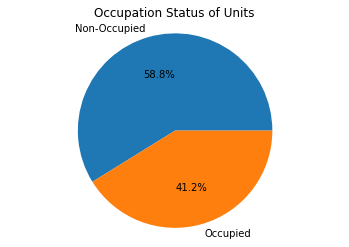

In [10]:
Status = [non_occupied,occupied]

my_labels = 'Non-Occupied','Occupied'
plt.pie(Status,labels=my_labels,autopct='%1.1f%%')
plt.title('Occupation Status of Units')
plt.axis('equal')
plt.show()

Text(0.5, 1.02, 'Total Number of Units by Unit Type')

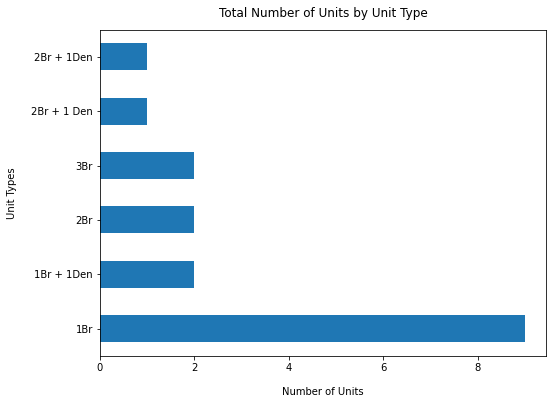

In [11]:
df['Unit_Type'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Number of Units", labelpad=14)
plt.ylabel("Unit Types", labelpad=14)
plt.title("Total Number of Units by Unit Type", y=1.02)